<a href="https://colab.research.google.com/github/AndrewCrossman/CISC275-Fall2018-first-git/blob/master/Stock_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Open [robinhood](https://robinhood.com/) trading app and use stock names in datareader.

Cryptocurrency Data Prices provided by [CoinGecko](https://www.coingecko.com/) with [documention](https://www.coingecko.com/en/api/documentation)

In [ ]:
!pip install pandas-datareader

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install pycoingecko

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
from pandas_datareader import data,wb
import pycoingecko
from pycoingecko import CoinGeckoAPI
from datetime import date
import matplotlib.pyplot as plt

In [ ]:
startdate = pd.to_datetime('2021-07-15')
enddate = pd.to_datetime(date.today())

In [ ]:
"BE MSFT TSLA AMZ TSM NCLH BABA NVDA "
df = data.DataReader("BE", 'stooq', startdate, enddate)
df

,Open,High,Low,Close,Volume
Date,,,,,
2023-01-05,19.84,19.90,18.92,19.16,1681368
2023-01-04,19.57,20.16,19.20,20.12,2114415
2023-01-03,19.64,19.98,18.83,19.19,3007553
2022-12-30,18.39,19.21,18.36,19.12,1433787
2022-12-29,18.20,18.85,18.09,18.70,1680524
...,...,...,...,...,...
2021-07-21,21.50,22.69,21.44,22.55,3090019
2021-07-20,20.24,21.17,19.75,20.88,2237487
2021-07-19,19.71,20.72,19.47,20.26,2832935


In [ ]:
df.keys()

Index(['Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')

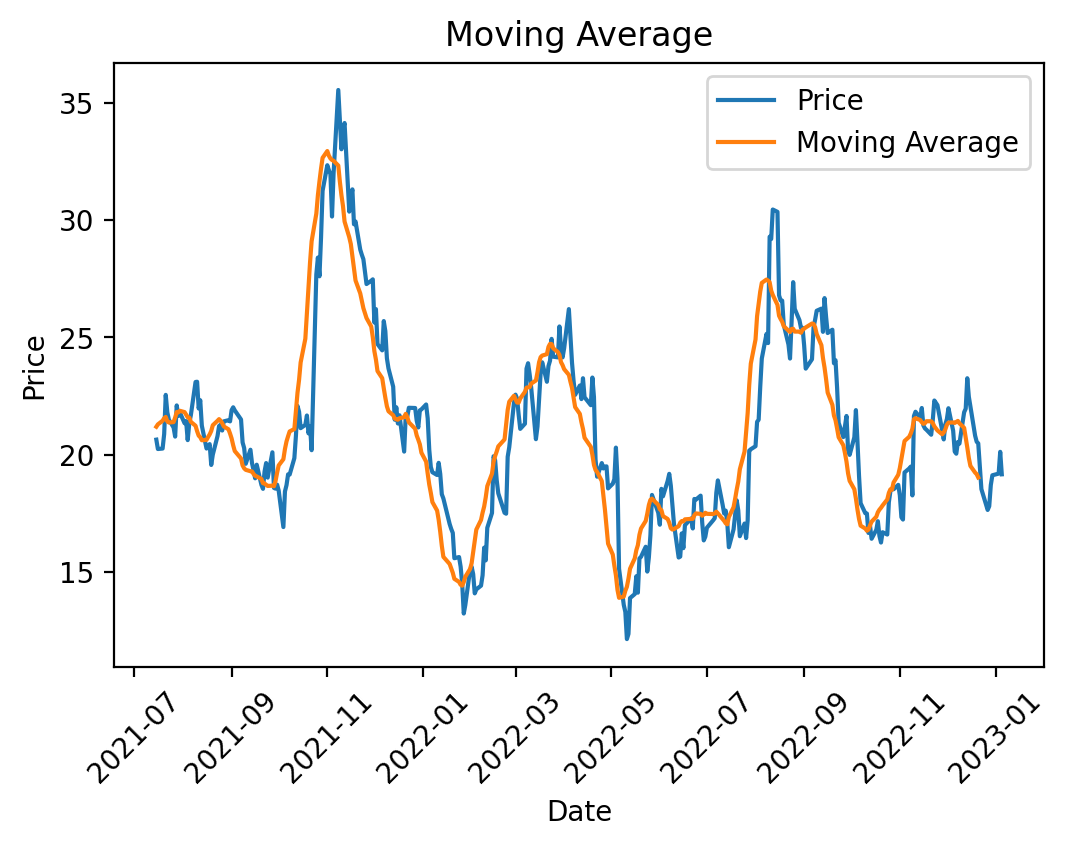

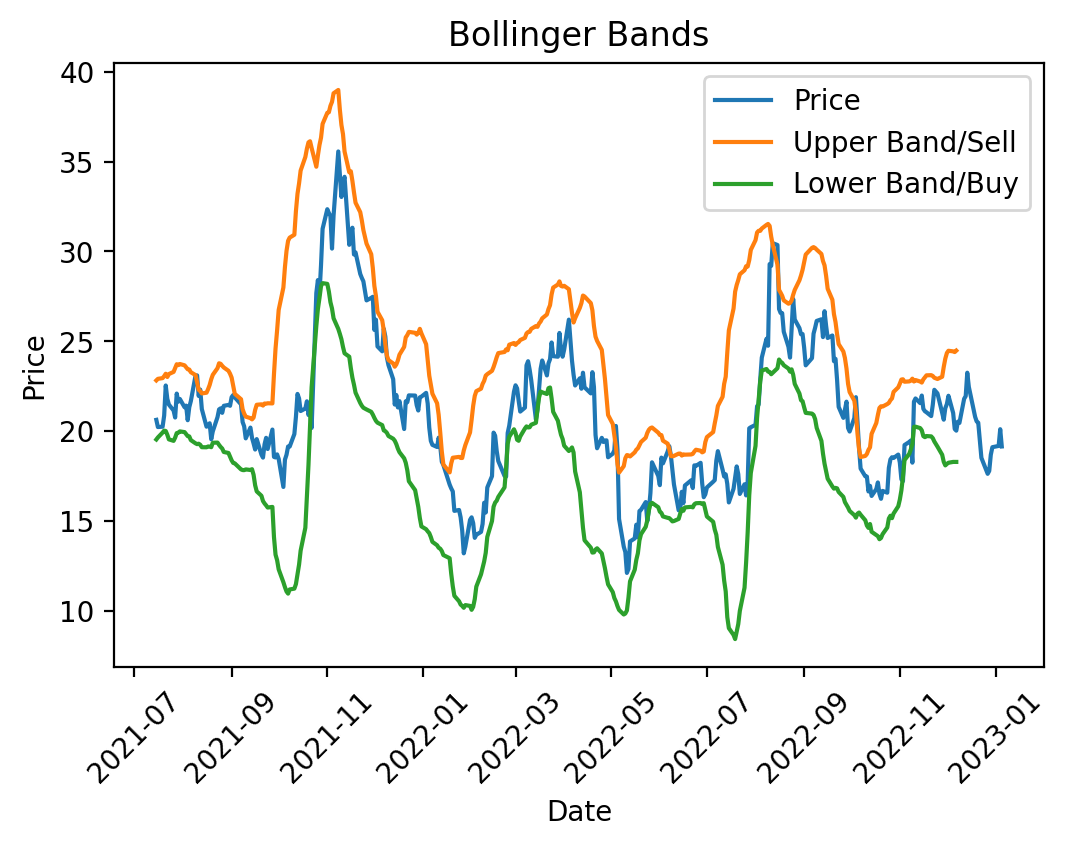

In [ ]:
# Calculate the moving average
df['MA'] = df['Close'].rolling(window=10).mean()

# Plot the moving average
plt.figure(figsize=(6,4), dpi=200) 
plt.plot(df['Close'], label='Price')
plt.plot( df['MA'], label='Moving Average')
plt.title('Moving Average')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.xticks(rotation = 45)
plt.show()

# Calculate the Bollinger Bands
df['STD'] = df['Close'].rolling(window=20).std()
df['Upper Band'] = df['MA'] + 2 * df['STD']
df['Lower Band'] = df['MA'] - 2 * df['STD']

# Plot the Bollinger Bands
plt.figure(figsize=(6,4), dpi=200) 
plt.plot( df['Close'], label='Price')
plt.plot( df['Upper Band'], label='Upper Band/Sell')
plt.plot(df['Lower Band'], label='Lower Band/Buy')
plt.title('Bollinger Bands')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.xticks(rotation = 45)
plt.show()

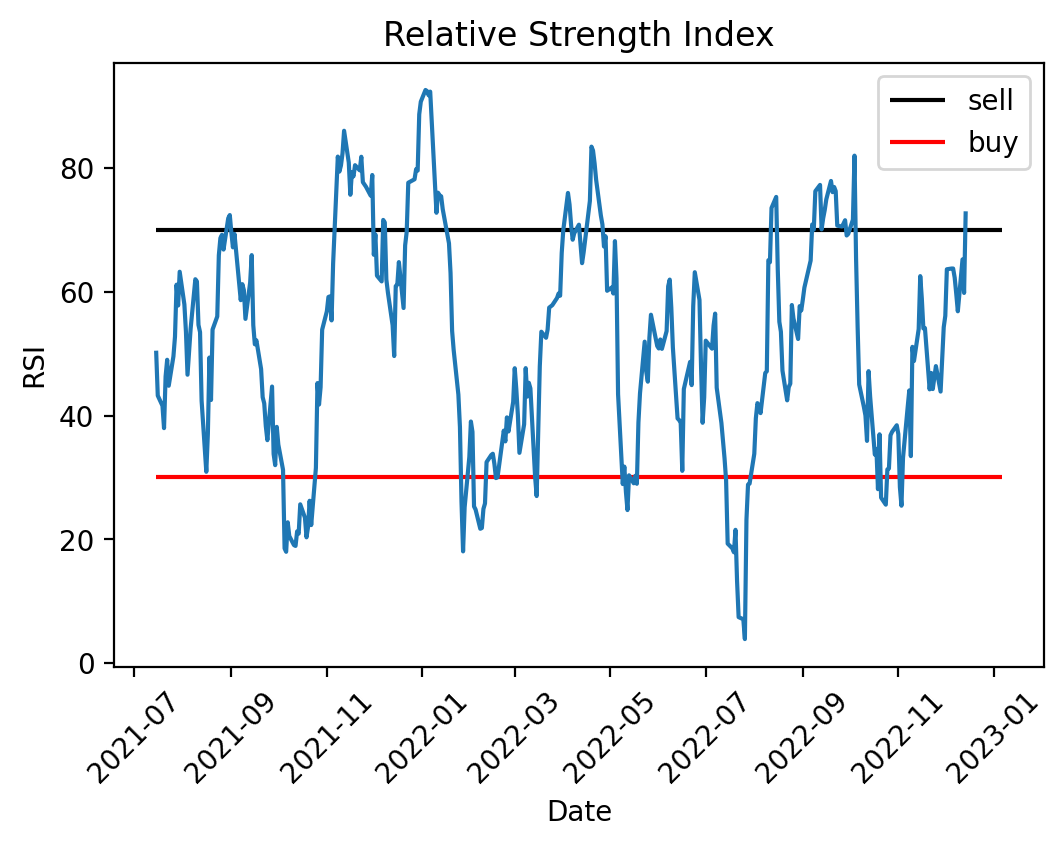

In [ ]:
# Calculate the RSI
diff = df['Close'].diff()
up, down = diff.copy(), diff.copy()
up[up < 0] = 0
down[down > 0] = 0

roll_up = up.rolling(window=14).mean()
roll_down = down.abs().rolling(window=14).mean()

rs = roll_up / roll_down
rsi = 100.0 - (100.0 / (1.0 + rs))

# Plot the RSI
plt.figure(figsize=(6,4), dpi=200) 
plt.plot(rsi)
plt.title('Relative Strength Index')
plt.xlabel('Date')
plt.ylabel('RSI')
plt.hlines(70,startdate,enddate,'k',label='sell')
plt.hlines(30,startdate,enddate,'r',label='buy')
plt.legend()
plt.xticks(rotation = 45)
plt.show()

MACD crossing above zero is considered bullish, while crossing below zero is bearish. Secondly, when MACD turns up from below zero it is considered bullish. When it turns down from above zero it is considered bearish

When the MACD line crosses from below to above the signal line, the indicator is considered bullish. The further below the zero line the stronger the signal.

When the MACD line crosses from above to below the signal line, the indicator is considered bearish. The further above the zero line the stronger the signal.

Info taken from [here](https://www.fidelity.com/learning-center/trading-investing/technical-analysis/technical-indicator-guide/macd#:~:text=When%20the%20MACD%20line%20crosses,line%20the%20stronger%20the%20signal.)

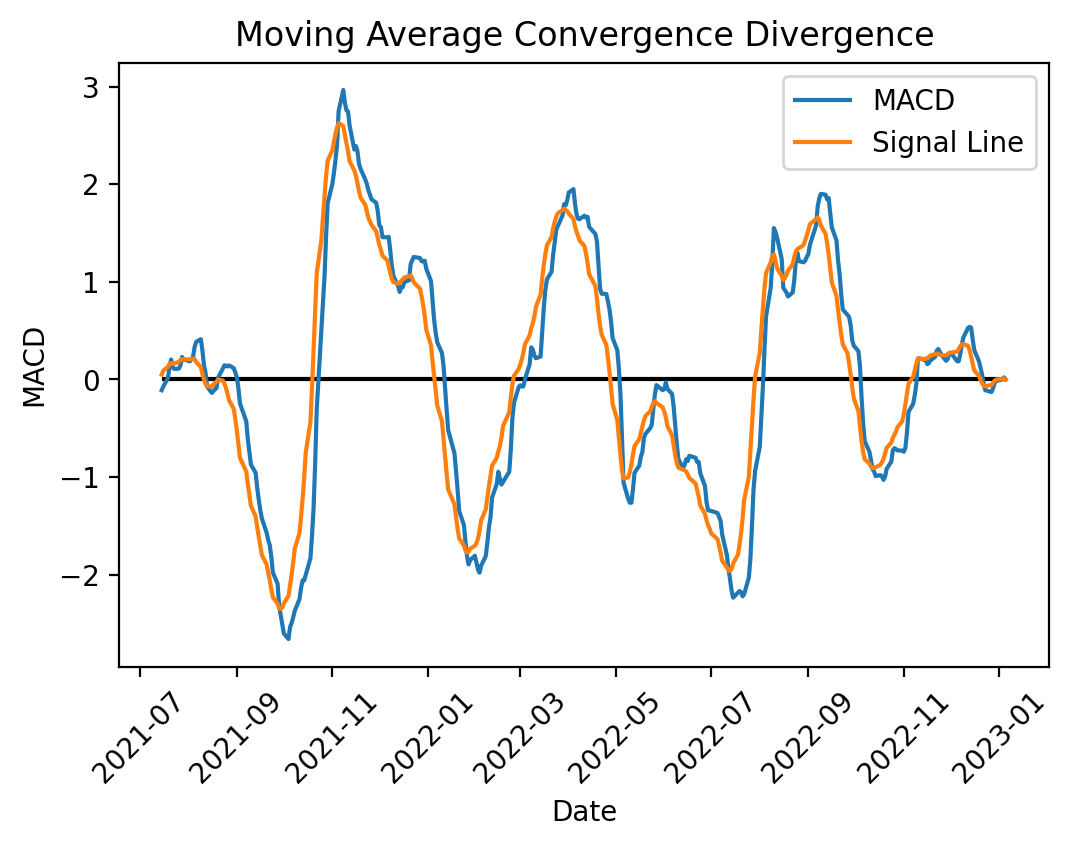

In [ ]:
# Calculate the MACD
ema_12 = df['Close'].ewm(span=12).mean()
ema_26 = df['Close'].ewm(span=26).mean()
macd = ema_12 - ema_26

# Calculate the signal line
signal = macd.ewm(span=9).mean()

# Plot the MACD and signal line
plt.figure(figsize=(6,4), dpi=200) 
plt.plot(macd, label='MACD')
plt.plot(signal, label='Signal Line')
plt.hlines(0,startdate,enddate,'k')
plt.title('Moving Average Convergence Divergence')
plt.xlabel('Date')
plt.ylabel('MACD')
plt.legend()
plt.xticks(rotation = 45)
plt.show()

In [ ]:
cg = CoinGeckoAPI()
#df = data.DataReader('BTC', 'coingecko', api_key=cg.api_key)
cg1 = pycoingecko.CoinGeckoAPI(api_key=cg.api_key)

In [ ]:
start_date = '2020-01-01'
end_date = '2022-01-01'
df = pd.DataFrame(cg1.get_coin_market_chart_by_id(id='bitcoin',vs_currency='usd',days='2'))

In [ ]:
df.prices = df.prices[1]


ValueError: ignored

In [ ]:
# Calculate the moving average
df['MA'] = df['prices'].rolling(window=10).mean()

# Plot the moving average
plt.figure(figsize=(6,4), dpi=200) 
plt.plot(df['prices'], label='Price')
plt.plot( df['MA'], label='Moving Average')
plt.title('Moving Average')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

# Calculate the Bollinger Bands
df['STD'] = df['prices'].rolling(window=20).std()
df['Upper Band'] = df['MA'] + 2 * df['STD']
df['Lower Band'] = df['MA'] - 2 * df['STD']

# Plot the Bollinger Bands
plt.figure(figsize=(6,4), dpi=200) 
plt.plot( df['prices'], label='Price')
plt.plot( df['Upper Band'], label='Upper Band/Sell')
plt.plot(df['Lower Band'], label='Lower Band/Buy')
plt.title('Bollinger Bands')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()